In [13]:
import numpy as np
from scipy.optimize import minimize, curve_fit
import matplotlib.pyplot as plt  # для проверки

In [14]:
x_data = list([
    [0.4516, 0.2349, 0.451, 0.8779, 0.4251, 0.4377, 0.425, 0.4692, 0.4225, 0.449, 0.364, 0.6579, 0.7769], 
    [52.2 * (10**(-6)), 39.78 * (10**(-6)), 44.31 * (10**(-6)), 84.45 * (10**(-6)), 55.71 * (10**(-6)), 57.86 * (10**(-6)), 51.05 * (10**(-6)), 52.64 * (10**(-6)), 37.1 * (10**(-6)), 42.87 * (10**(-6)), 42.67 * (10**(-6)), 56.22 * (10**(-6)), 69.01 * (10**(-6))]])

x_data = np.array(x_data)
x_data

array([[4.516e-01, 2.349e-01, 4.510e-01, 8.779e-01, 4.251e-01, 4.377e-01,
        4.250e-01, 4.692e-01, 4.225e-01, 4.490e-01, 3.640e-01, 6.579e-01,
        7.769e-01],
       [5.220e-05, 3.978e-05, 4.431e-05, 8.445e-05, 5.571e-05, 5.786e-05,
        5.105e-05, 5.264e-05, 3.710e-05, 4.287e-05, 4.267e-05, 5.622e-05,
        6.901e-05]])

In [15]:
V = np.array([1. * (10**(-4)), 1.15 * (10**(-4)), 1.3 * (10**(-4)), 1.45 * (10**(-4)), 1.6 * (10**(-4)), 1.75 * (10**(-4)), 1.9 * (10**(-4)), 2.05 * (10**(-4)), 2.2 * (10**(-4)), 2.35 * (10**(-4)), 2.5 * (10**(-4)), 2.65 * (10**(-4)), 2.8 * (10**(-4)), 2.95 * (10**(-4)), 3.1 * (10**(-4)), 3.25 * (10**(-4)), 3.4 * (10**(-4)), 3.55 * (10**(-4)), 3.7 * (10**(-4)), 3.85 * (10**(-4)), 4. * (10**(-4))])
P = np.array([173.89, 140.71, 115.71, 108.33, 103.18, 98.37, 94.31, 85.22, 80.66, 89.15, 79.12, 70.19, 70.65, 59.12, 59.45, 66.6, 68.27, 61.68, 66.1, 60.41, 47.02])

V

array([0.0001  , 0.000115, 0.00013 , 0.000145, 0.00016 , 0.000175,
       0.00019 , 0.000205, 0.00022 , 0.000235, 0.00025 , 0.000265,
       0.00028 , 0.000295, 0.00031 , 0.000325, 0.00034 , 0.000355,
       0.00037 , 0.000385, 0.0004  ])

In [16]:
# def model(V, a, b, v=1, R=8.314, T=350): # -> P
#     return ((v*R*T - (a*(v**2))/(V) + (a*(v**3)*b)/(V**2))/(V-v*b))

# def og_model(V, a, b, v=1, R=8.314, T=350):
#     return ((model(V, a, b) + (a*(v**2))/(V**2)) * (V - v*b)) == (v*R*T)

# print(og_model(1, 2, 3))
# print(model())

In [17]:
def model(V, a, b):
    v=1
    R=8.314
    T=350
    return ((v*R*T - (a*(v**2))/(V) + (a*(v**3)*b)/(V**2))/(V-v*b)) / 101325

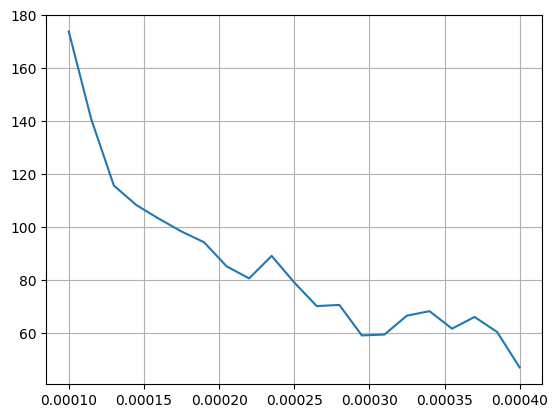

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Построить график
plt.plot(V, P)
plt.grid(True)
plt.show()

In [19]:
from scipy.optimize import curve_fit

init_guess = [0.4516, 52.2*10**-6]

params, _ = curve_fit(model, V, P, p0=init_guess, maxfev=50000)
a, b = params
a, b

(np.float64(0.42472941126763586), np.float64(5.1699320835415365e-05))

In [28]:
from scipy.optimize import curve_fit

guesses = [
    [100, 10],
    [200, 0,],
    [150, -0.01],
    [50, 0.001],
    [0.4516, 52.2*10**-6]
]

best_error = float('inf')
best_params = None

for guess in guesses:
    try:
        params, _ = curve_fit(model, V, P, p0=guess, maxfev=10000)
        predictions = model(V, *params)
        error = np.sum((P - predictions)**2)
        
        if error < best_error:
            best_error = error
            best_params = params
    except:
        continue

print(f"Лучшие параметры: {best_params}, {best_error}")

Лучшие параметры: [4.24729411e-01 5.16993208e-05], 498.9390879968121


In [29]:
# ============ ВЫЧИСЛЕНИЕ ОШИБКИ ============
P_model = model(V, a, b)
error = np.sum((P - P_model)**2)

print(f"Квадратичная ошибка: {error:.3f}")

Квадратичная ошибка: 498.939


In [22]:
# Ксенон

In [23]:
from scipy.optimize import minimize
import numpy as np

# ============ ОПРЕДЕЛЕНИЕ ОШИБКИ ============
def error_function(params, V, P):
    a, b = params
    model_values = model(V, a, b)
    
    # Квадратичная ошибка
    error = np.sum((P - model_values)**2)
    
    # Или абсолютная ошибка
    # error = np.sum(np.abs(sales - model_values))
    
    return error

# ============ МИНИМИЗАЦИЯ ============
init_guess = [0.4516, 52.2*10**-6]

result = minimize(
    error_function, 
    x0=init_guess, 
    args=(V, P),
    method='BFGS'  # Метод градиентного спуска
)

"""
**Методы оптимизации в minimize:**

| Метод | Когда использовать |
|-------|-------------------|
| `'BFGS'` | Универсальный, хорош для гладких функций |
| `'Nelder-Mead'` | Не требует градиентов, медленнее |
| `'Powell'` | Хорош для функций с шумом |
| `'L-BFGS-B'` | Если нужны ограничения на параметры |
"""

a1, b1 = result.x
print(f"Найденные параметры: {result.x}")
print(f"Минимальная ошибка: {result.fun}")

Найденные параметры: [4.24705329e-01 5.16971725e-05]
Минимальная ошибка: 498.93922628116013


In [24]:
gases = {
    'Ацетилен': (0.4516, 52.2e-6),
    'Криптон': (0.2349, 39.78e-6),
    'Бромоводород': (0.451, 44.31e-6),
    'Пропан': (0.8779, 84.45e-6),
    'Фторид кремния': (0.4251, 55.71e-6),
    'Моносилан': (0.4377, 57.86e-6),
    'Ксенон': (0.425, 51.05e-6),
    'Фторметан': (0.4692, 52.64e-6),
    'Аммиак': (0.4225, 37.1e-6),
    'Сероводород': (0.449, 42.87e-6),
    'Диоксид углерода': (0.364, 42.67e-6),
    'Хлор': (0.6579, 56.22e-6),
    'Циан': (0.7769, 69.01e-6)
}
# ============ ПОИСК БЛИЖАЙШЕГО ГАЗА ============
min_distance = float('inf')
best_gas = None

for gas_name, (a_table, b_table) in gases.items():
    # Евклидово расстояние
    distance = np.sqrt((a - a_table)**2 + (b - b_table)**2)
    
    if distance < min_distance:
        min_distance = distance
        best_gas = gas_name

print(f"\nОпределённый газ: {best_gas}")
print(f"Табличные параметры: a = {gases[best_gas][0]}, b = {gases[best_gas][1]:.2e}")

# ============ ВЫЧИСЛЕНИЕ ОШИБКИ ДЛЯ ТАБЛИЧНЫХ ПАРАМЕТРОВ ============
a_table, b_table = gases[best_gas]
P_table = model(V, a_table, b_table,)
error_table = np.sum((P - P_table)**2)

print(f"Ошибка с табличными параметрами: {error_table:.3f}")


Определённый газ: Ксенон
Табличные параметры: a = 0.425, b = 5.11e-05
Ошибка с табличными параметрами: 612.108
